# **CNN**
* **Daniel García Fallas**
* **Elias Arce Mendez**
* **Romario Ramirez**


In [1]:
import pandas as pd
import io
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
base_dir = os.path.dirname(os.getcwd())
covid_images_path = base_dir+'/COVID-19_Radiography_Dataset/COVID/images'
normal_images_path = base_dir+'/COVID-19_Radiography_Dataset/Normal/images'
lung_opacity_images_path = base_dir+'/COVID-19_Radiography_Dataset/Lung_Opacity/images'
viral_pneumonia_images_path = base_dir+'/COVID-19_Radiography_Dataset/Viral Pneumonia/images'



In [3]:
def loadImages(path, urls, target):
  images = []
  labels = []
  height, width = 299,299
  percentage_trim = 0.1
  pixels_clipping = int(min(height, width) * percentage_trim)
  
  for i in range(1345):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    # normalization
    img = img / 255.0
    # Reducción de dimenionalidad
    # img = img[pixels_clipping:height-pixels_clipping, pixels_clipping:width-pixels_clipping]
    
    # if we want to resize the images
    img = cv2.resize(img, (120, 120))

    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [4]:
#covid
covidUrl = os.listdir(covid_images_path)
covidImages, covidTargets = loadImages(covid_images_path, covidUrl, 1)
print("Covid: " , len(covidUrl), len(covidImages))


#normal
normalUrl = os.listdir(normal_images_path)
normalImages, normalTargets = loadImages(normal_images_path, normalUrl, 0)
print("Normal: " , len(normalUrl), len(normalImages))


#lung_opacity
lung_opacityUrl = os.listdir(lung_opacity_images_path)
lung_opacityImages, lung_opacityTargets = loadImages(lung_opacity_images_path, lung_opacityUrl, 2)
print("Lung Opacity: ", len(lung_opacityUrl), len(lung_opacityImages))


#viral_pneumonia
viral_pneumoniaUrl = os.listdir(viral_pneumonia_images_path)
viral_pneumoniaImages, viral_pneumoniaTargets = loadImages(viral_pneumonia_images_path,viral_pneumoniaUrl, 3)
print("Viral Pneumonia: " , len(viral_pneumoniaUrl), len(viral_pneumoniaImages))



Covid:  3616 1345
Normal:  10192 1345
Lung Opacity:  6012 1345
Viral Pneumonia:  1345 1345


In [5]:
data = np.r_[normalImages,covidImages,lung_opacityImages,viral_pneumoniaImages]
targets = np.r_[normalTargets,covidTargets,lung_opacityTargets,viral_pneumoniaTargets]

# scaler = StandardScaler()
# data = scaler.fit_transform(data)
# data = data.reshape(-1, 120, 120, 1)
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42, stratify=targets)
y_train = to_categorical(y_train.astype(np.int), num_classes=4)
y_test = to_categorical(y_test.astype(np.int), num_classes=4)

C:\Users\Garza\AppData\Local\Temp\ipykernel_19772\1072322689.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = to_categorical(y_train.astype(np.int), num_classes=4)
C:\Users\Garza\AppData\Local\Temp\ipykernel_19772\1072322689.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

In [6]:
from keras import metrics
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(120, 120, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

#compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)



Epoch 1/10
34/34 [==============================] - 55s 2s/step - loss: 1.1769 - accuracy: 0.5058 - precision: 0.6890 - recall: 0.2249
Epoch 2/10
34/34 [==============================] - 49s 1s/step - loss: 0.7273 - accuracy: 0.7059 - precision: 0.7541 - recall: 0.6255
Epoch 3/10
34/34 [==============================] - 48s 1s/step - loss: 0.6117 - accuracy: 0.7660 - precision: 0.8061 - recall: 0.7033
Epoch 4/10
34/34 [==============================] - 48s 1s/step - loss: 0.5034 - accuracy: 0.8139 - precision: 0.8479 - recall: 0.7693
Epoch 5/10
34/34 [==============================] - 50s 1s/step - loss: 0.4581 - accuracy: 0.8295 - precision: 0.8613 - recall: 0.7953
Epoch 6/10
34/34 [==============================] - 46s 1s/step - loss: 0.4276 - accuracy: 0.8436 - precision: 0.8718 - recall: 0.8109
Epoch 7/10
34/34 [==============================] - 44s 1s/step - loss: 0.3807 - accuracy: 0.8625 - precision: 0.8876 - recall: 0.8346
Epoch 8/10
34/34 [==============================] - 44s

# Tamaño del modelo

In [7]:
import sys

model_size = sys.getsizeof(model)
model_size_mb = model_size / (1024 * 1024)
print(f"Model Size: {model_size_mb} MB")

Model Size: 5.340576171875e-05 MB


In [8]:
# Evaluar el modelo en el conjunto de prueba
loss1, accuracy, precision_1, recall_1 = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)

print(f"Pérdida en el conjunto de prueba: {loss1}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")
print(f"Precisión en el conjunto de prueba: {precision_1}")
print(f"Recall en el conjunto de prueba: {recall_1}")

['loss', 'accuracy', 'precision', 'recall']
Pérdida en el conjunto de prueba: 0.4705483615398407
Accuracy en el conjunto de prueba: 0.821561336517334
Precisión en el conjunto de prueba: 0.8379942178726196
Recall en el conjunto de prueba: 0.8076208233833313


# Metrics without filter

34/34 [==============================] - 2s 53ms/step


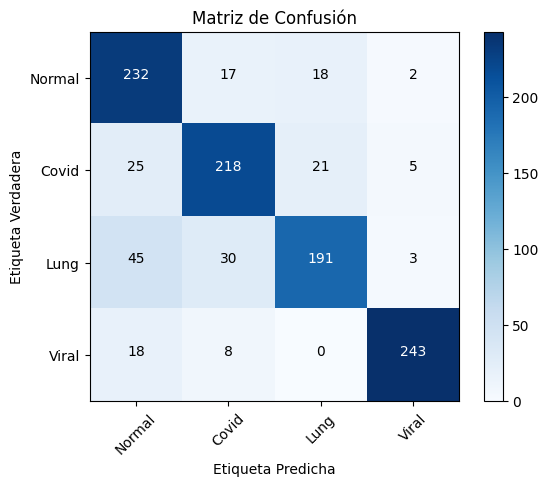

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Realizar predicciones con el modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test, axis=1)
# # Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

classes = ["Normal","Covid","Lung","Viral"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



In [10]:
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred,average="micro")
recall1 = recall_score(y_test, y_pred,average="micro")
f1_1 = f1_score(y_test, y_pred,average="micro")

print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-Score:", f1_1)

Accuracy: 0.8215613382899628
Precision: 0.8215613382899628
Recall: 0.8215613382899628
F1-Score: 0.8215613382899628


# CNN with bilateral filter

In [11]:
n_i_path = base_dir+'/COVID-19_Radiography_Dataset/Normal/images'
covid_images_path = base_dir+'/COVID-19_Radiography_Dataset/COVID/Covid-Bilateral-Filter'
normal_images_path = base_dir+'/COVID-19_Radiography_Dataset/Normal/Normal-Bilateral-Filter'
lung_opacity_images_path = base_dir+'/COVID-19_Radiography_Dataset/Lung_Opacity/Lung-Bilateral-Filter'
viral_pneumonia_images_path = base_dir+'/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral-Bilateral-Filter'

(299, 299, 3)


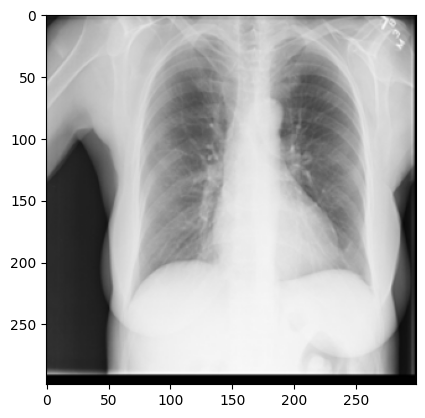

In [12]:
img = cv2.imread(n_i_path+"/Normal-22.png")
plt.imshow(img)
print(img.shape)

(299, 299, 3)


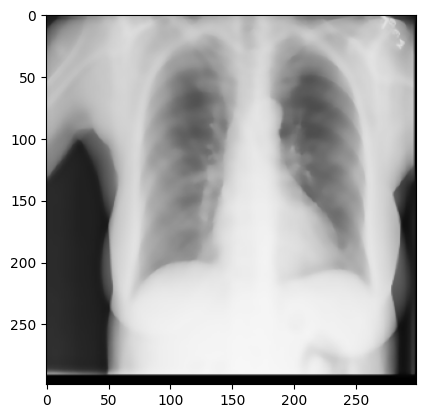

In [13]:
img = cv2.imread(normal_images_path+"/Normal-22-filtrado.png")
plt.imshow(img)
print(img.shape)

# Upload Filtered Images

In [14]:
#covid
covidUrl = os.listdir(covid_images_path)
covidImages, covidTargets = loadImages(covid_images_path, covidUrl, 1)
print("Covid: " , len(covidUrl), len(covidImages))


#normal
normalUrl = os.listdir(normal_images_path)
normalImages, normalTargets = loadImages(normal_images_path, normalUrl, 0)
print("Normal: " , len(normalUrl), len(normalImages))


#lung_opacity
lung_opacityUrl = os.listdir(lung_opacity_images_path)
lung_opacityImages, lung_opacityTargets = loadImages(lung_opacity_images_path, lung_opacityUrl, 2)
print("Lung Opacity: ", len(lung_opacityUrl), len(lung_opacityImages))


#viral_pneumonia
viral_pneumoniaUrl = os.listdir(viral_pneumonia_images_path)
viral_pneumoniaImages, viral_pneumoniaTargets = loadImages(viral_pneumonia_images_path,viral_pneumoniaUrl, 3)
print("Viral Pneumonia: " , len(viral_pneumoniaUrl), len(viral_pneumoniaImages))

Covid:  3616 1345
Normal:  10192 1345
Lung Opacity:  6012 1345
Viral Pneumonia:  1345 1345


In [15]:
data = np.r_[normalImages,covidImages,lung_opacityImages,viral_pneumoniaImages]
targets = np.r_[normalTargets,covidTargets,lung_opacityTargets,viral_pneumoniaTargets]

# scaler = StandardScaler()
# data = scaler.fit_transform(data)
# data = data.reshape(-1, 120, 120, 1)
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42, stratify=targets)
y_train = to_categorical(y_train.astype(np.int), num_classes=4)
y_test = to_categorical(y_test.astype(np.int), num_classes=4)

C:\Users\Garza\AppData\Local\Temp\ipykernel_19772\1072322689.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = to_categorical(y_train.astype(np.int), num_classes=4)
C:\Users\Garza\AppData\Local\Temp\ipykernel_19772\1072322689.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(120, 120, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))

#compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)


Epoch 1/10
34/34 [==============================] - 46s 1s/step - loss: 1.2856 - accuracy: 0.4656 - precision_1: 0.5891 - recall_1: 0.1729
Epoch 2/10
34/34 [==============================] - 46s 1s/step - loss: 0.7714 - accuracy: 0.6917 - precision_1: 0.7482 - recall_1: 0.5901
Epoch 3/10
34/34 [==============================] - 44s 1s/step - loss: 0.6222 - accuracy: 0.7618 - precision_1: 0.8056 - recall_1: 0.6989
Epoch 4/10
34/34 [==============================] - 44s 1s/step - loss: 0.5572 - accuracy: 0.7886 - precision_1: 0.8272 - recall_1: 0.7351
Epoch 5/10
34/34 [==============================] - 44s 1s/step - loss: 0.5143 - accuracy: 0.8076 - precision_1: 0.8464 - recall_1: 0.7630
Epoch 6/10
34/34 [==============================] - 44s 1s/step - loss: 0.4729 - accuracy: 0.8248 - precision_1: 0.8594 - recall_1: 0.7865
Epoch 7/10
34/34 [==============================] - 44s 1s/step - loss: 0.4286 - accuracy: 0.8446 - precision_1: 0.8717 - recall_1: 0.8102
Epoch 8/10
34/34 [=========

# Model size

In [17]:
import sys

model_size = sys.getsizeof(model)
model_size_mb = model_size / (1024 * 1024)
print(f"Model Size: {model_size_mb} MB")

Model Size: 5.340576171875e-05 MB


In [18]:
loss2, accuracy, precision_1, recall_1 = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)

print(f"Pérdida en el conjunto de prueba: {loss2}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")
print(f"Precisión en el conjunto de prueba: {precision_1}")
print(f"Recall en el conjunto de prueba: {recall_1}")

['loss', 'accuracy', 'precision_1', 'recall_1']
Pérdida en el conjunto de prueba: 0.45153719186782837
Accuracy en el conjunto de prueba: 0.8336431384086609
Precisión en el conjunto de prueba: 0.8518518805503845
Recall en el conjunto de prueba: 0.8122676610946655


# Metrics with filter

34/34 [==============================] - 2s 52ms/step


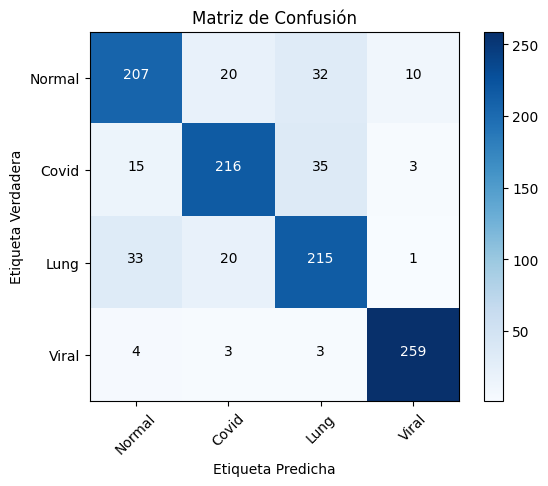

In [19]:
# Realizar predicciones con el modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test, axis=1)
# # Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

classes = ["Normal","Covid","Lung","Viral"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()

In [20]:
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred,average="micro")
recall2 = recall_score(y_test, y_pred,average="micro")
f1_2 = f1_score(y_test, y_pred,average="micro")

print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-Score:", f1_2)

Accuracy: 0.8336431226765799
Precision: 0.8336431226765799
Recall: 0.8336431226765799
F1-Score: 0.8336431226765799


# Tabla comparativa

In [21]:
import pandas as pd

data = {
    'Modelo': ['Modelo sin filtrado', 'Modelo con filtrado'],
    'Accuracy': [accuracy1, accuracy2],
    'Precision': [precision1, precision2],
    'Recall': [recall1, recall2],
    'F1-score': [f1_1, f1_2],
    'Loss': [loss1,loss2]
}

df = pd.DataFrame(data)
df.set_index('Modelo', inplace=True)

print(df)

                     Accuracy  Precision    Recall  F1-score      Loss
Modelo                                                                
Modelo sin filtrado  0.821561   0.821561  0.821561  0.821561  0.470548
Modelo con filtrado  0.833643   0.833643  0.833643  0.833643  0.451537


# Mapas de calor

34/34 [==============================] - 2s 51ms/step


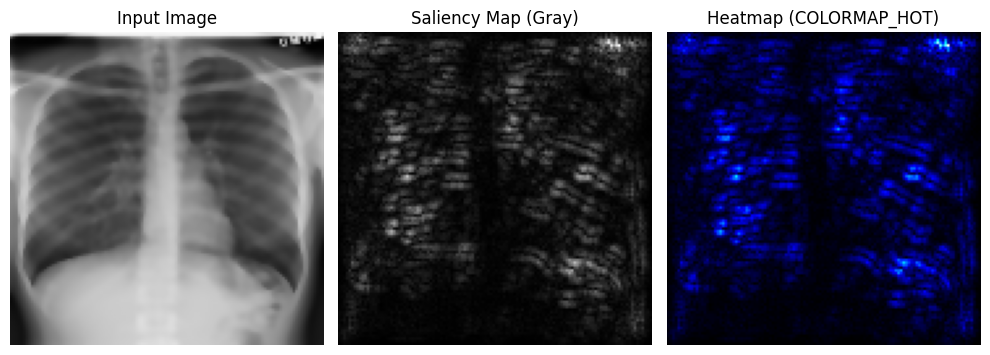

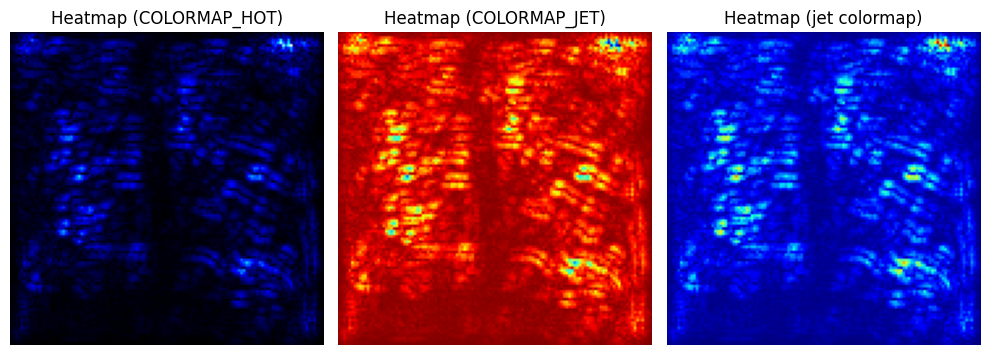

In [22]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Obtener la capa de salida de interés
output_layer = model.layers[-2]

# Crear un modelo basado en la capa de salida
saliency_model = tf.keras.Model(inputs=model.input, outputs=output_layer.output)

# Obtener las predicciones del modelo para las imágenes de prueba
predictions = model.predict(X_test)

# Calcular el Saliency Map para una imagen de prueba
input_image = X_test[1]
input_image = np.expand_dims(input_image, axis=0)
with tf.GradientTape() as tape:
    input_image = tf.convert_to_tensor(input_image)
    tape.watch(input_image)
    output = saliency_model(input_image)
gradients = tape.gradient(output, input_image)
saliency_map = tf.reduce_max(tf.abs(gradients), axis=-1)
saliency_map = saliency_map.numpy()

# Normalizar el Saliency Map
saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))

# Convertir el Saliency Map a una imagen de tipo CV_8UC3
saliency_map_uint8 = np.uint8(255 * saliency_map)

# Mostrar la imagen inicial y el mapa de saliencia en escala de grises
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(input_image[0])
axes[0].axis('off')
axes[0].set_title('Input Image')

saliency_map_uint8 = np.squeeze(saliency_map_uint8)
axes[1].imshow(saliency_map_uint8, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Saliency Map (Gray)')

heatmap = cv2.applyColorMap(saliency_map_uint8, cv2.COLORMAP_HOT)
axes[2].imshow(heatmap)
axes[2].axis('off')
axes[2].set_title('Heatmap (COLORMAP_HOT)')

plt.tight_layout()
plt.show()

# Mostrar los mapas de calor
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(heatmap)
axes[0].axis('off')
axes[0].set_title('Heatmap (COLORMAP_HOT)')

heatmap2 = cv2.applyColorMap(saliency_map_uint8, cv2.COLORMAP_JET)
axes[1].imshow(heatmap2)
axes[1].axis('off')
axes[1].set_title('Heatmap (COLORMAP_JET)')

heatmap3 = cm.jet(saliency_map_uint8)
axes[2].imshow(heatmap3)
axes[2].axis('off')
axes[2].set_title('Heatmap (jet colormap)')

plt.tight_layout()
plt.show()

![mapa1](images/photo_5154887317540940701_y.jpg)
![mapa2](images/photo_5154887317540940703_y.jpg)
![mapa3](images/photo_5154887317540940704_y.jpg)
![mapa4](images/photo_5154887317540940705_y.jpg)
![mapa5](images/photo_5154887317540940707_y.jpg)
![mapa6](images/photo_5154887317540940708_y.jpg)